In [338]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import time
import json
import matplotlib.pyplot as plt
import glob
import cv2
import seaborn as sns

In [339]:
coins_cruz = pickle.load(open('./Output/data/coinsRes_cruces_5406.pkl',"rb"))

## Dataset completo 

In [340]:
coins_cruz.head()


,label,image,path
0,10c,"[[[93, 105, 111], [82, 94, 100], [85, 97, 103]...",Inputs/coins/10c/resized/img_90_270.jpg
1,10c,"[[[125, 123, 123], [119, 119, 119], [108, 107,...",Inputs/coins/10c/resized/img_90_258.jpg
2,10c,"[[[41, 98, 129], [93, 156, 184], [30, 91, 117]...",Inputs/coins/10c/resized/train_21_56.jpg
3,10c,"[[[226, 228, 229], [226, 228, 229], [218, 220,...",Inputs/coins/10c/resized/test_18_24.jpg
4,10c,"[[[61, 92, 123], [50, 81, 112], [61, 89, 119],...",Inputs/coins/10c/resized/IMG_4207_17.jpg


In [341]:
coins_cruz['image'].iloc[0].shape

(70, 70, 3)

In [342]:
dummies = pd.get_dummies(coins_cruz['label'])

In [343]:
dummies['gt'] = dummies.apply(lambda x: pd.Series([x.values]), axis=1)

In [344]:
dummies.head()

,10c,1c,1e,20c,2c,2e,50c,5c,gt
0,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
2,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
3,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
4,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"


In [345]:
data_new=coins_cruz.join(dummies)
data_new.head()

,label,image,path,10c,1c,1e,20c,2c,2e,50c,5c,gt
0,10c,"[[[93, 105, 111], [82, 94, 100], [85, 97, 103]...",Inputs/coins/10c/resized/img_90_270.jpg,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,10c,"[[[125, 123, 123], [119, 119, 119], [108, 107,...",Inputs/coins/10c/resized/img_90_258.jpg,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
2,10c,"[[[41, 98, 129], [93, 156, 184], [30, 91, 117]...",Inputs/coins/10c/resized/train_21_56.jpg,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
3,10c,"[[[226, 228, 229], [226, 228, 229], [218, 220,...",Inputs/coins/10c/resized/test_18_24.jpg,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
4,10c,"[[[61, 92, 123], [50, 81, 112], [61, 89, 119],...",Inputs/coins/10c/resized/IMG_4207_17.jpg,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"


In [346]:
data_new.shape

(5406, 12)

(70, 70)

(4900,)

## Dataset sin 1e, 2e

In [315]:
test=coins_cruz.copy()
dummies_test = pd.get_dummies(test['label'])
dummies_test['gt'] = dummies_test.apply(lambda x: pd.Series([x.values]), axis=1)

In [316]:
dummies_test.head()

,10c,1c,1e,20c,2c,2e,50c,5c,gt
0,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
2,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
3,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
4,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"


In [317]:
test_all = test.join(dummies_test)

test_cent = test_all[~test_all["label"].isin(["1e","2e"])]
test_cent = test_cent[['image','gt']]

In [256]:
display(test_cent.head())
test_cent.shape

,image,gt
0,"[[[93, 105, 111], [82, 94, 100], [85, 97, 103]...","[1, 0, 0, 0, 0, 0, 0, 0]"
1,"[[[125, 123, 123], [119, 119, 119], [108, 107,...","[1, 0, 0, 0, 0, 0, 0, 0]"
2,"[[[41, 98, 129], [93, 156, 184], [30, 91, 117]...","[1, 0, 0, 0, 0, 0, 0, 0]"
3,"[[[226, 228, 229], [226, 228, 229], [218, 220,...","[1, 0, 0, 0, 0, 0, 0, 0]"
4,"[[[61, 92, 123], [50, 81, 112], [61, 89, 119],...","[1, 0, 0, 0, 0, 0, 0, 0]"


(3406, 2)

In [257]:
test_cent_X = test_cent['image']
test_cent_y = test_cent['gt']

## Dataset solo 1c, 2c, 5c

In [273]:
test_all.head()

,label,image,path,10c,1c,1e,20c,2c,2e,50c,5c,gt
0,10c,"[[[93, 105, 111], [82, 94, 100], [85, 97, 103]...",Inputs/coins/10c/resized/img_90_270.jpg,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,10c,"[[[125, 123, 123], [119, 119, 119], [108, 107,...",Inputs/coins/10c/resized/img_90_258.jpg,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
2,10c,"[[[41, 98, 129], [93, 156, 184], [30, 91, 117]...",Inputs/coins/10c/resized/train_21_56.jpg,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
3,10c,"[[[226, 228, 229], [226, 228, 229], [218, 220,...",Inputs/coins/10c/resized/test_18_24.jpg,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"
4,10c,"[[[61, 92, 123], [50, 81, 112], [61, 89, 119],...",Inputs/coins/10c/resized/IMG_4207_17.jpg,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]"


In [271]:
test_cu = test_all[test_all["label"].isin(["1c","2c",'5c'])]
test_cu = test_cu[['image','gt']]

In [272]:
test_cu.shape

(1832, 2)

In [291]:
test_cu_X = np.stack(test_cu['image'])/255.0
test_cu_y = np.stack(test_cu['gt'])

## Dataset solo 10c, 20c, 50c

In [275]:
test_au = test_all[test_all["label"].isin(["10c","20c",'50c'])]
test_au = test_au[['image','gt']]

In [292]:
test_au_X = np.stack(test_au['image'])/255.0
test_au_y = np.stack(test_au['gt'])

## Sacamos los valores de X e y para entrenar el modelo

In [355]:
img_rows, img_cols, img_channels = 70, 70, 3

In [366]:
X = np.stack(data_new['image'])
X = X / 255.0

In [367]:
y= np.stack(data_new['gt'])

In [368]:
y.shape

(5406, 8)

In [370]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [323]:
input_shape=(img_rows, img_cols, img_channels)
num_classes=8

In [371]:
# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(4324, 4900) (1082, 4900) (4324, 8) (1082, 8)


In [325]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(10, 10),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adadelta',
              metrics=['accuracy'])

In [326]:
batch_size = 50
epochs = 10

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 4324 samples, validate on 1082 samples
Epoch 1/10
4324/4324 [==============================] - 65s 15ms/step - loss: 1.8076 - accuracy: 0.3592 - val_loss: 1.1345 - val_accuracy: 0.5952
Epoch 2/10
4324/4324 [==============================] - 65s 15ms/step - loss: 1.0055 - accuracy: 0.6508 - val_loss: 0.7008 - val_accuracy: 0.7523
Epoch 3/10
4324/4324 [==============================] - 63s 15ms/step - loss: 0.6813 - accuracy: 0.7623 - val_loss: 0.5024 - val_accuracy: 0.8161
Epoch 4/10
4324/4324 [==============================] - 69s 16ms/step - loss: 0.4855 - accuracy: 0.8182 - val_loss: 0.5840 - val_accuracy: 0.7911
Epoch 5/10
4324/4324 [==============================] - 69s 16ms/step - loss: 0.4722 - accuracy: 0.8353 - val_loss: 0.3064 - val_accuracy: 0.8715
Epoch 6/10
4324/4324 [==============================] - 67s 16ms/step - loss: 0.3710 - accuracy: 0.8740 - val_loss: 0.4503 - val_accuracy: 0.8189
Epoch 7/10
4324/4324 [==============================] - 66s 15ms/step - loss

In [294]:
'''batch_size = 50
epochs = 20

history = model.fit(test_au_X, test_au_y, initial_epoch=15,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))'''

Train on 1574 samples, validate on 1082 samples
Epoch 16/20
1574/1574 [==============================] - 22s 14ms/step - loss: 0.4333 - accuracy: 0.8361 - val_loss: 0.4844 - val_accuracy: 0.8142
Epoch 17/20
1574/1574 [==============================] - 23s 14ms/step - loss: 0.2452 - accuracy: 0.9009 - val_loss: 1.0639 - val_accuracy: 0.6793
Epoch 18/20
1574/1574 [==============================] - 22s 14ms/step - loss: 0.2375 - accuracy: 0.9047 - val_loss: 1.1756 - val_accuracy: 0.6710
Epoch 19/20
1574/1574 [==============================] - 22s 14ms/step - loss: 0.2292 - accuracy: 0.9085 - val_loss: 1.3916 - val_accuracy: 0.6100
Epoch 20/20
1574/1574 [==============================] - 22s 14ms/step - loss: 0.1959 - accuracy: 0.9130 - val_loss: 1.3302 - val_accuracy: 0.6248


In [327]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.252207243233203
Test accuracy: 0.9075785875320435


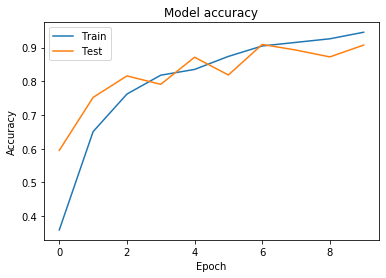

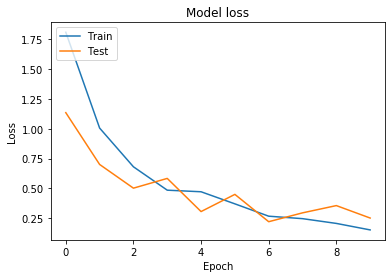

In [328]:

%matplotlib inline
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Guardar el modelo

In [78]:
moment=time.localtime()
name='Model_{}_{}-{}-{}.h5'.format(model.history.history["val_accuracy"][-1],moment[2],moment[3],moment[4])
model.save(name)

In [79]:
model_json = model.to_json()
with open(name+'.json', "w") as json_file:
    json.dump(model_json, json_file)

model.save_weights(name)

### Predicción con test

[4 2 5 ... 5 6 6]
[4 2 5 ... 5 3 6]


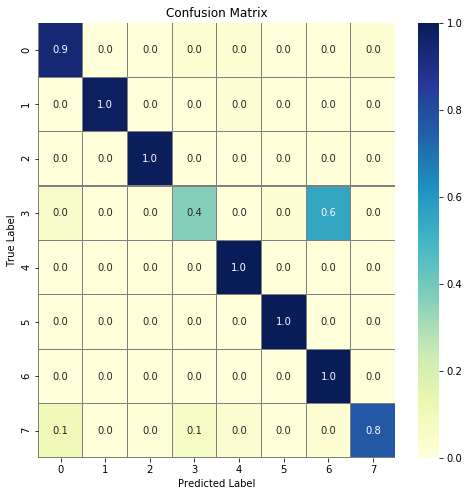

In [329]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
print(Y_pred_classes)
Y_true = np.argmax(y_test,axis = 1)
print(Y_true)
# compute the confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [159]:
labels = ['10c', '1c', '1e', '20c', '2c', '2e', '50c', '5c']

In [330]:
%matplotlib inline
from PIL import Image
img = X_test[31].astype('float32')
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(pred)
print("Probs -> 10 cent:{0:.5f} 1 cent:{1:.5f} 1 euro:{2:.5f} 20 cent:{3:.5f} 2 cent:{4:.5f} 2 euros:{5:.5f} 50 cent:{6:.5f} 5 cent:{7:.5f}".format(pred[0],pred[1],pred[2],pred[3],pred[4],pred[5],pred[6],pred[7]))
print(np.expand_dims(img,axis=0).shape)

[1.4766330e-04 6.4900559e-12 2.3822624e-09 2.9482792e-09 9.9985111e-01
 2.2560117e-15 2.6592699e-12 1.2355263e-06]
Probs -> 10 cent:0.00015 1 cent:0.00000 1 euro:0.00000 20 cent:0.00000 2 cent:0.99985 2 euros:0.00000 50 cent:0.00000 5 cent:0.00000
(1, 70, 70, 3)


In [161]:
def transfImag(path):
    print ('transforming image from {}'.format(path))

    img=cv2.imread(path)
    img_data=cv2.resize(img,(70,70))
    
    img_data = np.stack(img_data)
    img_data = img_data / 255.0
    
    return img_data

In [162]:
transfImag('new_images/1.jpg')

transforming image from new_images/1.jpg


array([[[0.49019608, 0.56862745, 0.75294118],
        [0.44705882, 0.5372549 , 0.71764706],
        [0.49411765, 0.58039216, 0.77254902],
        ...,
        [0.22745098, 0.43529412, 0.68235294],
        [0.19607843, 0.40392157, 0.65098039],
        [0.20784314, 0.41568627, 0.6627451 ]],

       [[0.50196078, 0.59215686, 0.77254902],
        [0.4627451 , 0.55686275, 0.7372549 ],
        [0.44313725, 0.53333333, 0.7254902 ],
        ...,
        [0.24705882, 0.45490196, 0.70196078],
        [0.19607843, 0.40392157, 0.65098039],
        [0.20784314, 0.41568627, 0.6627451 ]],

       [[0.48235294, 0.57254902, 0.75294118],
        [0.54117647, 0.63529412, 0.81568627],
        [0.4627451 , 0.56470588, 0.75294118],
        ...,
        [0.25882353, 0.46666667, 0.70980392],
        [0.19215686, 0.4       , 0.64705882],
        [0.21568627, 0.42352941, 0.67058824]],

       ...,

       [[0.22352941, 0.44705882, 0.68627451],
        [0.24705882, 0.47058824, 0.70980392],
        [0.22745098, 0

transforming image from new_images/1.jpg
(1, 70, 70, 3)
[5.4490706e-03 3.7443626e-06 7.4401902e-07 1.1786623e-03 2.7767450e-03
 9.9051535e-01 1.6590246e-05 5.9062324e-05]
Probs -> 10 cent:0.00545 1 cent:0.00000 1 euro:0.00000 20 cent:0.00118 2 cent:0.00278 2 euros:0.99052 50 cent:0.00002 5 cent:0.00006
(1, 227, 222, 3)


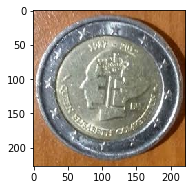

In [390]:
PIC = transfImag('new_images/1.jpg') # transform pic

img=cv2.imread('new_images/1.jpg') # get the array of the original pic
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img) # original pic


PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 70, 70, 3)
print(PIC.shape)
pred2 = model.predict(PIC)[0]
print(pred2)
print("Probs -> 10 cent:{0:.5f} 1 cent:{1:.5f} 1 euro:{2:.5f} 20 cent:{3:.5f} 2 cent:{4:.5f} 2 euros:{5:.5f} 50 cent:{6:.5f} 5 cent:{7:.5f}".format(pred2[0],pred2[1],pred2[2],pred2[3],pred2[4],pred2[5],pred2[6],pred2[7]))
print(np.expand_dims(img,axis=0).shape)

transforming image from new_images/3.jpg
(1, 70, 70, 3)
[2.8413556e-08 4.4409990e-08 2.5091085e-03 5.9114983e-03 2.0084021e-04
 1.7097624e-04 9.9119323e-01 1.4253680e-05]
Probs -> 10 cent:0.00000 1 cent:0.00000 1 euro:0.00251 20 cent:0.00591 2 cent:0.00020 2 euros:0.00017 50 cent:0.99119 5 cent:0.00001
(1, 225, 224, 3)


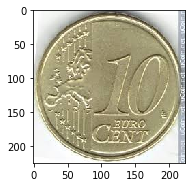

In [391]:
PIC = transfImag('new_images/3.jpg') # transform pic

img=cv2.imread('new_images/3.jpg') # get the array of the original pic
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img) # original pic


PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 70, 70, 3)
print(PIC.shape)
pred2 = model.predict(PIC)[0]
print(pred2)
print("Probs -> 10 cent:{0:.5f} 1 cent:{1:.5f} 1 euro:{2:.5f} 20 cent:{3:.5f} 2 cent:{4:.5f} 2 euros:{5:.5f} 50 cent:{6:.5f} 5 cent:{7:.5f}".format(pred2[0],pred2[1],pred2[2],pred2[3],pred2[4],pred2[5],pred2[6],pred2[7]))
print(np.expand_dims(img,axis=0).shape)

transforming image from new_images/4.jpg
(1, 70, 70, 3)
[2.0419701e-07 1.9298068e-06 7.6363976e-03 2.1769330e-02 3.1902111e-01
 1.1502789e-02 6.4004022e-01 2.7966324e-05]
Probs -> 10 cent:0.00000 1 cent:0.00000 1 euro:0.00764 20 cent:0.02177 2 cent:0.31902 2 euros:0.01150 50 cent:0.64004 5 cent:0.00003
(1, 500, 500, 3)


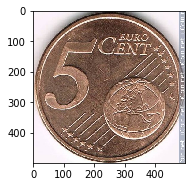

In [392]:
PIC = transfImag('new_images/4.jpg') # transform pic

img=cv2.imread('new_images/4.jpg') # get the array of the original pic
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img) # original pic


PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 70, 70, 3)
print(PIC.shape)
pred2 = model.predict(PIC)[0]
print(pred2)
print("Probs -> 10 cent:{0:.5f} 1 cent:{1:.5f} 1 euro:{2:.5f} 20 cent:{3:.5f} 2 cent:{4:.5f} 2 euros:{5:.5f} 50 cent:{6:.5f} 5 cent:{7:.5f}".format(pred2[0],pred2[1],pred2[2],pred2[3],pred2[4],pred2[5],pred2[6],pred2[7]))
print(np.expand_dims(img,axis=0).shape)

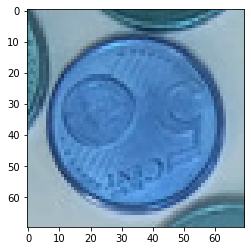

In [198]:
plt.imshow(X_train[24])

In [225]:
model.predict(np.array([X_train[24]]))

array([[4.8591051e-04, 7.5456731e-11, 1.4900219e-16, 1.3188328e-05,
        1.4563321e-06, 1.4598528e-10, 2.3176591e-12, 9.9949944e-01]],
      dtype=float32)

In [226]:
X = np.stack(test_X)
X = X / 255.0
y= np.stack(test_y)

In [249]:
'''batch_size = 50
epochs = 20

history = model.fit(X, y, initial_epoch=11,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))'''

Train on 5406 samples, validate on 1082 samples
Epoch 12/20
5406/5406 [==============================] - 80s 15ms/step - loss: 0.0869 - accuracy: 0.9721 - val_loss: 0.1085 - val_accuracy: 0.9593
Epoch 13/20
5406/5406 [==============================] - 72s 13ms/step - loss: 0.0704 - accuracy: 0.9776 - val_loss: 0.3339 - val_accuracy: 0.9224
Epoch 14/20
5406/5406 [==============================] - 71s 13ms/step - loss: 0.0606 - accuracy: 0.9797 - val_loss: 0.0889 - val_accuracy: 0.9612
Epoch 15/20
5406/5406 [==============================] - 72s 13ms/step - loss: 0.0683 - accuracy: 0.9780 - val_loss: 0.0290 - val_accuracy: 0.9880
Epoch 16/20
5406/5406 [==============================] - 72s 13ms/step - loss: 0.0614 - accuracy: 0.9780 - val_loss: 0.0310 - val_accuracy: 0.9852
Epoch 17/20
5406/5406 [==============================] - 71s 13ms/step - loss: 0.0422 - accuracy: 0.9845 - val_loss: 0.0250 - val_accuracy: 0.9898
Epoch 18/20
5406/5406 [==============================] - 72s 13ms/step

transforming image from new_images/50c_1.jpg
(1, 70, 70, 3)
[3.74326390e-14 1.70914257e-14 2.00676259e-05 1.17173324e-04
 8.23770463e-03 1.34058314e-06 9.91623580e-01 2.75904161e-10]
Probs -> 10 cent:0.00000 1 cent:0.00000 1 euro:0.00002 20 cent:0.00012 2 cent:0.00824 2 euros:0.00000 50 cent:0.99162 5 cent:0.00000
(1, 226, 223, 3)


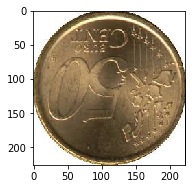

In [393]:
from scipy import ndimage
PIC = transfImag('new_images/50c_1.jpg') # transform pic


img=cv2.imread('new_images/50c_1.jpg') # get the array of the original pic
img = ndimage.rotate(img, 180)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.subplot(121)
plt.imshow(img) # original pic


PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 70, 70, 3)
print(PIC.shape)
pred2 = model.predict(PIC)[0]
print(pred2)
print("Probs -> 10 cent:{0:.5f} 1 cent:{1:.5f} 1 euro:{2:.5f} 20 cent:{3:.5f} 2 cent:{4:.5f} 2 euros:{5:.5f} 50 cent:{6:.5f} 5 cent:{7:.5f}".format(pred2[0],pred2[1],pred2[2],pred2[3],pred2[4],pred2[5],pred2[6],pred2[7]))
print(np.expand_dims(img,axis=0).shape)